In [26]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import imutils

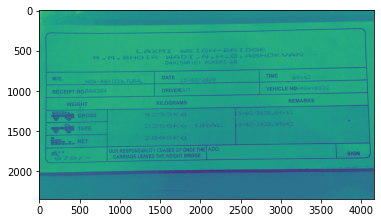

In [27]:
img = cv2.imread("../sample_grayscale.jpg", 0)
plt.imshow(img)

In [28]:
gray = cv2.bilateralFilter(img, 11, 17, 17)
edged = cv2.Canny(gray, 30, 200)

In [29]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

In [30]:
# loop over our contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.015 * peri, True)
	# if our approximated contour has four points, then
	# we can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break

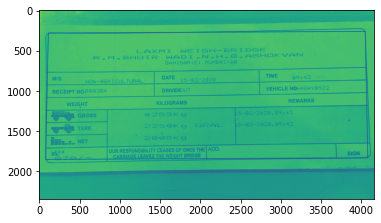

In [31]:
cv2.drawContours(img, [screenCnt], -1, (0, 255, 0), 3) 
plt.imshow(img)

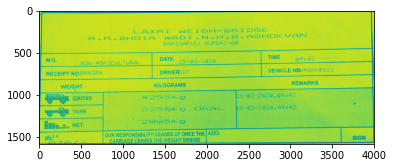

In [32]:
x,y,w,h = cv2.boundingRect(screenCnt)
new_img=img[y:y+h,x:x+w]
plt.imshow(new_img)

In [33]:
cv2.imwrite("../sample_cropped.jpg", new_img)

True